Challenge: Boston Marathon

You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [28]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Model imports
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

# Cluster evalutations
from sklearn import metrics

Importing results data from 2014 Boston Marathon Database.

In [29]:
data = pd.read_csv('results_2014.csv')

In [30]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [5]:
#Drop ctz columns (that contains null values)

In [6]:
data = data.drop('ctz', axis = 1)

In [7]:
#Checking unique values in the columns

In [8]:
data.nunique()

10k           2766
name         31915
division      6979
25k           6570
gender           2
age             64
official     11030
bib          31984
genderdiv    17575
35k           9516
overall      31931
pace           727
state           68
30k           8090
5k            1491
half          5651
20k           5375
country         78
city          5934
40k          10546
dtype: int64

We are dropping 'name' and 'bib' since they seem unique to each player and create dummy variables for gender (feamle =0, male =1)

In [9]:
data= data.drop(['name', 'bib'], axis=1)
data.gender= data.gender.map(lambda x: 0 if x is 'F' else 1)


In [10]:
data.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 18 columns):
10k          31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null int64
age          31984 non-null int64
official     31984 non-null float64
genderdiv    31984 non-null int64
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(5), object(11)
memory usage: 4.4+ MB


In [12]:
benefit = ['10k', '25k', '5k','half', '20k', '25k', '30k', '35k', '40k']

for dist in benefit:
    data[dist] = pd.to_numeric(data[dist], errors='coerce')
    data[dist] = data[dist].map(lambda x: data[dist].mean() if x is '-' else float(x))

data.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 18 columns):
10k          31934 non-null float64
division     31984 non-null int64
25k          31768 non-null float64
gender       31984 non-null int64
age          31984 non-null int64
official     31984 non-null float64
genderdiv    31984 non-null int64
35k          31950 non-null float64
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31944 non-null float64
5k           31932 non-null float64
half         31912 non-null float64
20k          31933 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31945 non-null float64
dtypes: float64(10), int64(5), object(3)
memory usage: 4.4+ MB


Choosing the features for regrouping

In [14]:
X = data.drop(['state', 'country', 'city'], axis =1)

Normalizing the data and creating 2 feature PCA for  graphing

In [15]:
Xn = normalize(X.dropna(axis = 0, how = 'any'))
print(len(Xn))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xn)

31649


Spiltting the data into 4 equal sub samples for cross validation

In [16]:
#Divide into two sets
Xhalf1, Xhalf2, Xpca_1, Xpca_2= train_test_split(Xn, X_pca, test_size=0.5, random_state=42)

#Divide into four sets
X1, X2, Xpca1, Xpca2 = train_test_split(Xhalf1, Xpca_1, test_size = 0.5, random_state = 42)
X3, X4, Xpca3, Xpca4 = train_test_split(Xhalf2, Xpca_2, test_size=0.5, random_state = 42)

#Checking the lenght of each set
print(len(X1), len(Xpca1))
print(len(X2), len(Xpca2))
print(len(X3), len(Xpca3))
print(len(X4), len(Xpca4))


7912 7912
7912 7912
7912 7912
7913 7913


In [17]:
# Ensuring all sets are the same length
X2 = X2[:7912][:]
X4 = X4[:7912][:]

Xpca2 = Xpca2[:7912][:]
Xpca4 = Xpca4[:7912][:]

print(len(X2), len(Xpca2))
print(len(X4), len(Xpca4))

7912 7912
7912 7912


K Means Modeling

We are creating two data frames: y predictions from a K Means model, and silhouette scores for the different clusters. 
Later we will fit the model for 2 to 5 clusters, calculating silhouette scores 

In [18]:
# Initialize data frames
ypred = pd.DataFrame()
score = pd.DataFrame(columns=['cluster_pred','sil_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, Xpca1),
    (X2, Xpca2),
    (X3, Xpca3),
    (X4, Xpca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 6):
       
        # Instantiating and fit_predicting model to then add to data frame
        kmeans = KMeans(n_clusters=nclust, random_state=42)
        pred = kmeans.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = kmeans.labels_
        sscore = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score = score.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore}, ignore_index=True)

In [19]:
# Sorting silhouette scores
score.sort_values(by='silhouette_score', ascending = False)

,cluster_pred,sil_score,silhouette_score
14,clust4_sample3,NaN,0.498514
10,clust4_sample2,NaN,0.495041
2,clust4_sample0,NaN,0.494338
6,clust4_sample1,NaN,0.492633
13,clust3_sample3,NaN,0.481397
1,clust3_sample0,NaN,0.480159
9,clust3_sample2,NaN,0.478402
5,clust3_sample1,NaN,0.471739
4,clust2_sample1,NaN,0.461813
8,clust2_sample2,NaN,0.452349


A four cluster system gives consistent silhouette score

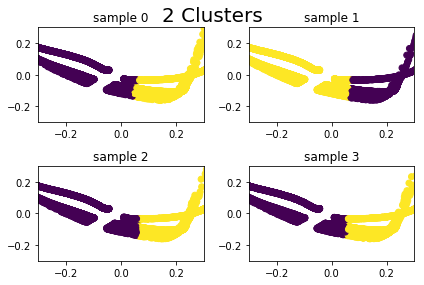

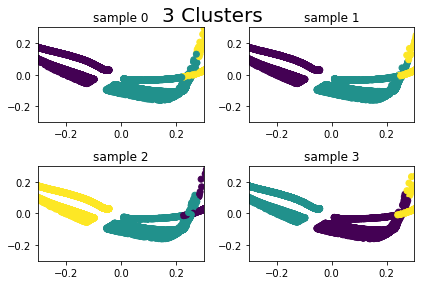

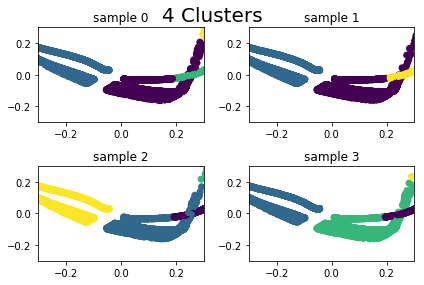

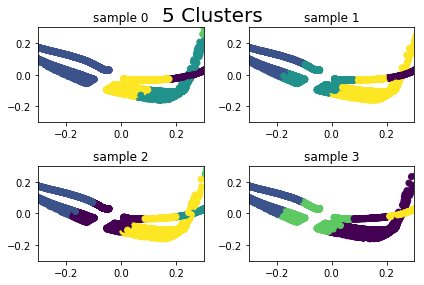

In [20]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 6):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

The 4 cluster solution seems consistent across sample 0 and 1 but incosistent in sample 2 and 3

Mean Shift Modeling

In [21]:
# Initialize new data frames
ypred_ms = pd.DataFrame()
score_ms = pd.DataFrame(columns=['cluster_pred','mean_shift', 'quantile'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Creating a list of possible quantiles to test in mean shift.
    for n in [0.1, 0.2, 0.3, 0.4, 0.5]:
        
        # Estimating number of clusters for data
        bandwidth = estimate_bandwidth(data, quantile=n, n_samples=500)
        
        # Ensuring all sets are the same lenght
        data = data[:7912][:]
        
        # Instantiating and fit_predicting model to then add to data frame
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = ms.fit_predict(data)
        labels = ms.labels_
        cntrs = len(np.unique(labels))
        ypred_ms['clust' + str(cntrs) + '_sample' + str(counter)] = pred
       
    # Calculating silhouette scores for the data and adding that to the shilouette score
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score_ms = score_ms.append({'cluster_pred':'clust' + str(cntrs) + '_sample' + str(counter), 
                              'silhouette_score':sscore, 'quantile':n}, ignore_index=True)

In [22]:
score_ms.sort_values(by= 'silhouette_score', ascending =False)

,cluster_pred,mean_shift,quantile,silhouette_score
16,clust3_sample3,NaN,0.2,0.535465
17,clust3_sample3,NaN,0.3,0.533959
6,clust4_sample1,NaN,0.2,0.529459
1,clust3_sample0,NaN,0.2,0.527177
7,clust4_sample1,NaN,0.3,0.513486
18,clust5_sample3,NaN,0.4,0.511181
19,clust4_sample3,NaN,0.5,0.508507
9,clust3_sample1,NaN,0.5,0.505248
13,clust6_sample2,NaN,0.4,0.505241
0,clust12_sample0,NaN,0.1,0.502908


The quantile of 0.2 calculated a high Silhouette score for sample 3 and generated 3 clusters.

Spectral Clustering

For the spectral clustering model, we use a range of clusters from 2 to 6, and we calculate the corresponding Silhouette scores for each.

In [23]:
# Initialize data frames
ypred_sc = pd.DataFrame()
score_sc = pd.DataFrame(columns=['cluster_pred','silhouette_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, Xpca1),
    (X2, Xpca2),
    (X3, Xpca3),
    (X4, Xpca4)]):
    
    # Put the features into ypred.
    ypred_sc['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred_sc['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 6):
        # Instantiating and fit_predicting model to then add to data frame
        sc = SpectralClustering(n_clusters=nclust)
        pred = sc.fit_predict(data[0])
        ypred_sc['clust' + str(nclust) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = sc.labels_
        sscore_sc = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score_sc = score_sc.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore_sc}, ignore_index=True)

In [24]:
score_sc.sort_values(by = 'silhouette_score', ascending = False)

,cluster_pred,silhouette_score
15,clust5_sample3,0.497959
3,clust5_sample0,0.494183
11,clust5_sample2,0.493496
14,clust4_sample3,0.492979
7,clust5_sample1,0.491098
10,clust4_sample2,0.489460
2,clust4_sample0,0.488743
6,clust4_sample1,0.486450
4,clust2_sample1,0.474149
0,clust2_sample0,0.456296


A 5 cluster configurations generates the highest silhouette score (approx 49%)

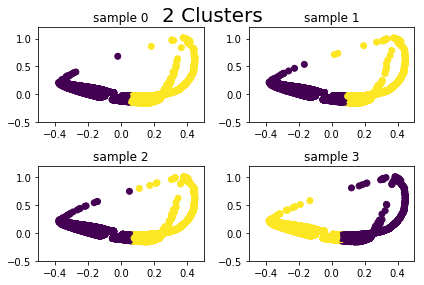

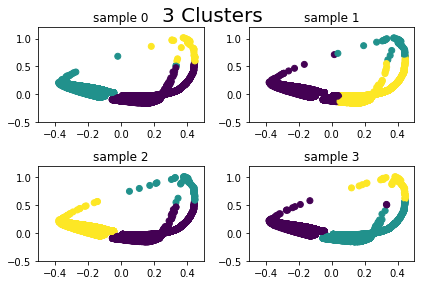

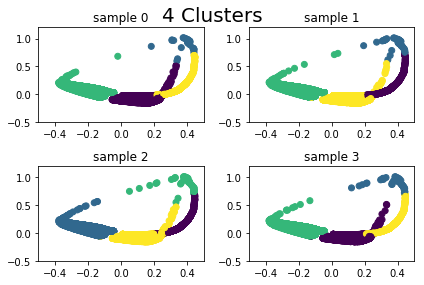

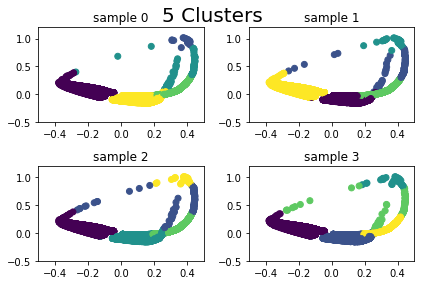

In [25]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 6):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred_sc['pca_f1_sample{}'.format(i)]
        y_sub = ypred_sc['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred_sc['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.5, .5])
        axarr[rows, cols].set_ylim([-.5, 1.2])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

2 cluster configuration shows consistent soution across sample 2, 3 and 4 and 3 cluster confuguration shows consistent solution across sample 1 and 3.

Affinity propagation

In [26]:
# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','Affinity_propagation'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    
    # Ensuring all sets are the same length
    data = data[:7912][:]
    
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    
    pred = af.fit_predict(data)
    ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    
    # Calculating silhouette scores for the data and adding that to the shilouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'Affinity_propagation':sscore_af}, ignore_index=True)

In [27]:
score_af.sort_values(by='Affinity_propagation', ascending=False)

,cluster_pred,Affinity_propagation
3,clust5557_sample3,0.103191
0,clust5998_sample0,0.080796
1,clust6108_sample1,0.076380
2,clust6856_sample2,0.040938


The generated clusters seems unreliable

3 cluster configuration gives the highest silhuoette score
 The mean shift model generated the highest Silhouette score with a value at 0.535 This drives us to the conclusion that the are 3 main group of runners in this marathon. 